In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plot

In [3]:
%matplotlib inline

In [4]:
import requests
from pandas.io.json import json_normalize
import json

In [5]:
r = requests.get('https://api.covid19india.org/state_test_data.json')

In [6]:
result = r.json()

In [7]:
gj_tested = []
tn_tested = []
mh_tested = []
dl_tested = []
rj_tested = []
kt_tested = []
wb_tested = []
tn_date = []
gj_date = []
rj_date = []
mh_date = []
kt_date = []
dl_date = []
wb_date = []

In [8]:
for i in range(len(result['states_tested_data'])):
    if result['states_tested_data'][i]['state'] == 'Tamil Nadu':
        tn_tested.append(result['states_tested_data'][i]['totaltested'])
        tn_date.append(result['states_tested_data'][i]['updatedon'])
    elif result['states_tested_data'][i]['state'] == 'Gujarat':
        gj_tested.append(result['states_tested_data'][i]['totaltested'])
        gj_date.append(result['states_tested_data'][i]['updatedon'])
    elif result['states_tested_data'][i]['state'] == 'Rajasthan':
        rj_tested.append(result['states_tested_data'][i]['totaltested'])
        rj_date.append(result['states_tested_data'][i]['updatedon'])
    elif result['states_tested_data'][i]['state'] == 'Maharashtra':
        mh_tested.append(result['states_tested_data'][i]['totaltested'])
        mh_date.append(result['states_tested_data'][i]['updatedon'])
    elif result['states_tested_data'][i]['state'] == 'Karnataka':
        kt_tested.append(result['states_tested_data'][i]['totaltested'])
        kt_date.append(result['states_tested_data'][i]['updatedon'])
    elif result['states_tested_data'][i]['state'] == 'Delhi':
        dl_tested.append(result['states_tested_data'][i]['totaltested'])
        dl_date.append(result['states_tested_data'][i]['updatedon'])
    elif result['states_tested_data'][i]['state'] == 'West Bengal':
        wb_tested.append(result['states_tested_data'][i]['totaltested'])
        wb_date.append(result['states_tested_data'][i]['updatedon'])

In [9]:
tn_tested = [int(i) if i else 0 for i in tn_tested] 
gj_tested = [int(i) if i else 0 for i in gj_tested] 
rj_tested = [int(i) if i else 0 for i in rj_tested] 
mh_tested = [int(i) if i else 0 for i in mh_tested] 
kt_tested = [int(i) if i else 0 for i in kt_tested] 
dl_tested = [int(i) if i else 0 for i in dl_tested] 
wb_tested = [int(i) if i else 0 for i in wb_tested]

In [10]:
gj_daywise_tested = []
tn_daywise_tested = []
mh_daywise_tested = []
dl_daywise_tested = []
rj_daywise_tested = []
kt_daywise_tested = []
wb_daywise_tested = []

In [11]:
gj_daywise_tested.append(gj_tested[0])
for i in range(len(gj_tested)-1):
    gj_daywise_tested.append(gj_tested[i+1]-gj_tested[i])
tn_daywise_tested.append(tn_tested[0])
for i in range(len(tn_tested)-1):
    tn_daywise_tested.append(tn_tested[i+1]-tn_tested[i])
mh_daywise_tested.append(mh_tested[0])
for i in range(len(mh_tested)-1):
    mh_daywise_tested.append(mh_tested[i+1]-mh_tested[i])
dl_daywise_tested.append(dl_tested[0])
for i in range(len(dl_tested)-1):
    dl_daywise_tested.append(dl_tested[i+1]-dl_tested[i])
rj_daywise_tested.append(rj_tested[0])
for i in range(len(rj_tested)-1):
    rj_daywise_tested.append(rj_tested[i+1]-rj_tested[i])
kt_daywise_tested.append(kt_tested[0])
for i in range(len(kt_tested)-1):
    kt_daywise_tested.append(kt_tested[i+1]-kt_tested[i])
wb_daywise_tested.append(wb_tested[0])
for i in range(len(wb_tested)-1):
    wb_daywise_tested.append(wb_tested[i+1]-wb_tested[i])

In [12]:
gj_daywise_tested[58]

5695

In [13]:
daywise_gj_df = pd.DataFrame(list(zip(gj_date, gj_daywise_tested)),
              columns=['DATE','CASE'])
daywise_gj_df.set_index('DATE',inplace=True)
daywise_tn_df = pd.DataFrame(list(zip(tn_date, tn_daywise_tested)),
              columns=['DATE','CASE'])
daywise_tn_df.set_index('DATE',inplace=True)
daywise_mh_df = pd.DataFrame(list(zip(mh_date, mh_daywise_tested)),
              columns=['DATE','CASE'])
daywise_mh_df.set_index('DATE',inplace=True)
daywise_rj_df = pd.DataFrame(list(zip(rj_date, rj_daywise_tested)),
              columns=['DATE','CASE'])
daywise_rj_df.set_index('DATE',inplace=True)
daywise_dl_df = pd.DataFrame(list(zip(dl_date, dl_daywise_tested)),
              columns=['DATE','CASE'])
daywise_dl_df.set_index('DATE',inplace=True)
daywise_kt_df = pd.DataFrame(list(zip(kt_date, kt_daywise_tested)),
              columns=['DATE','CASE'])
daywise_kt_df.set_index('DATE',inplace=True)
daywise_wb_df = pd.DataFrame(list(zip(wb_date, wb_daywise_tested)),
              columns=['DATE','CASE'])
daywise_wb_df.set_index('DATE',inplace=True)


In [14]:
len(wb_date[47:])
#len(gj_daywise_tested[29:])
#len(rj_daywise_tested[32:])
#len(tn_daywise_tested[31:])
#len(wb_daywise_tested[33:])
#len(mh_daywise_tested[41:])
len(rj_daywise_tested[46:])

30

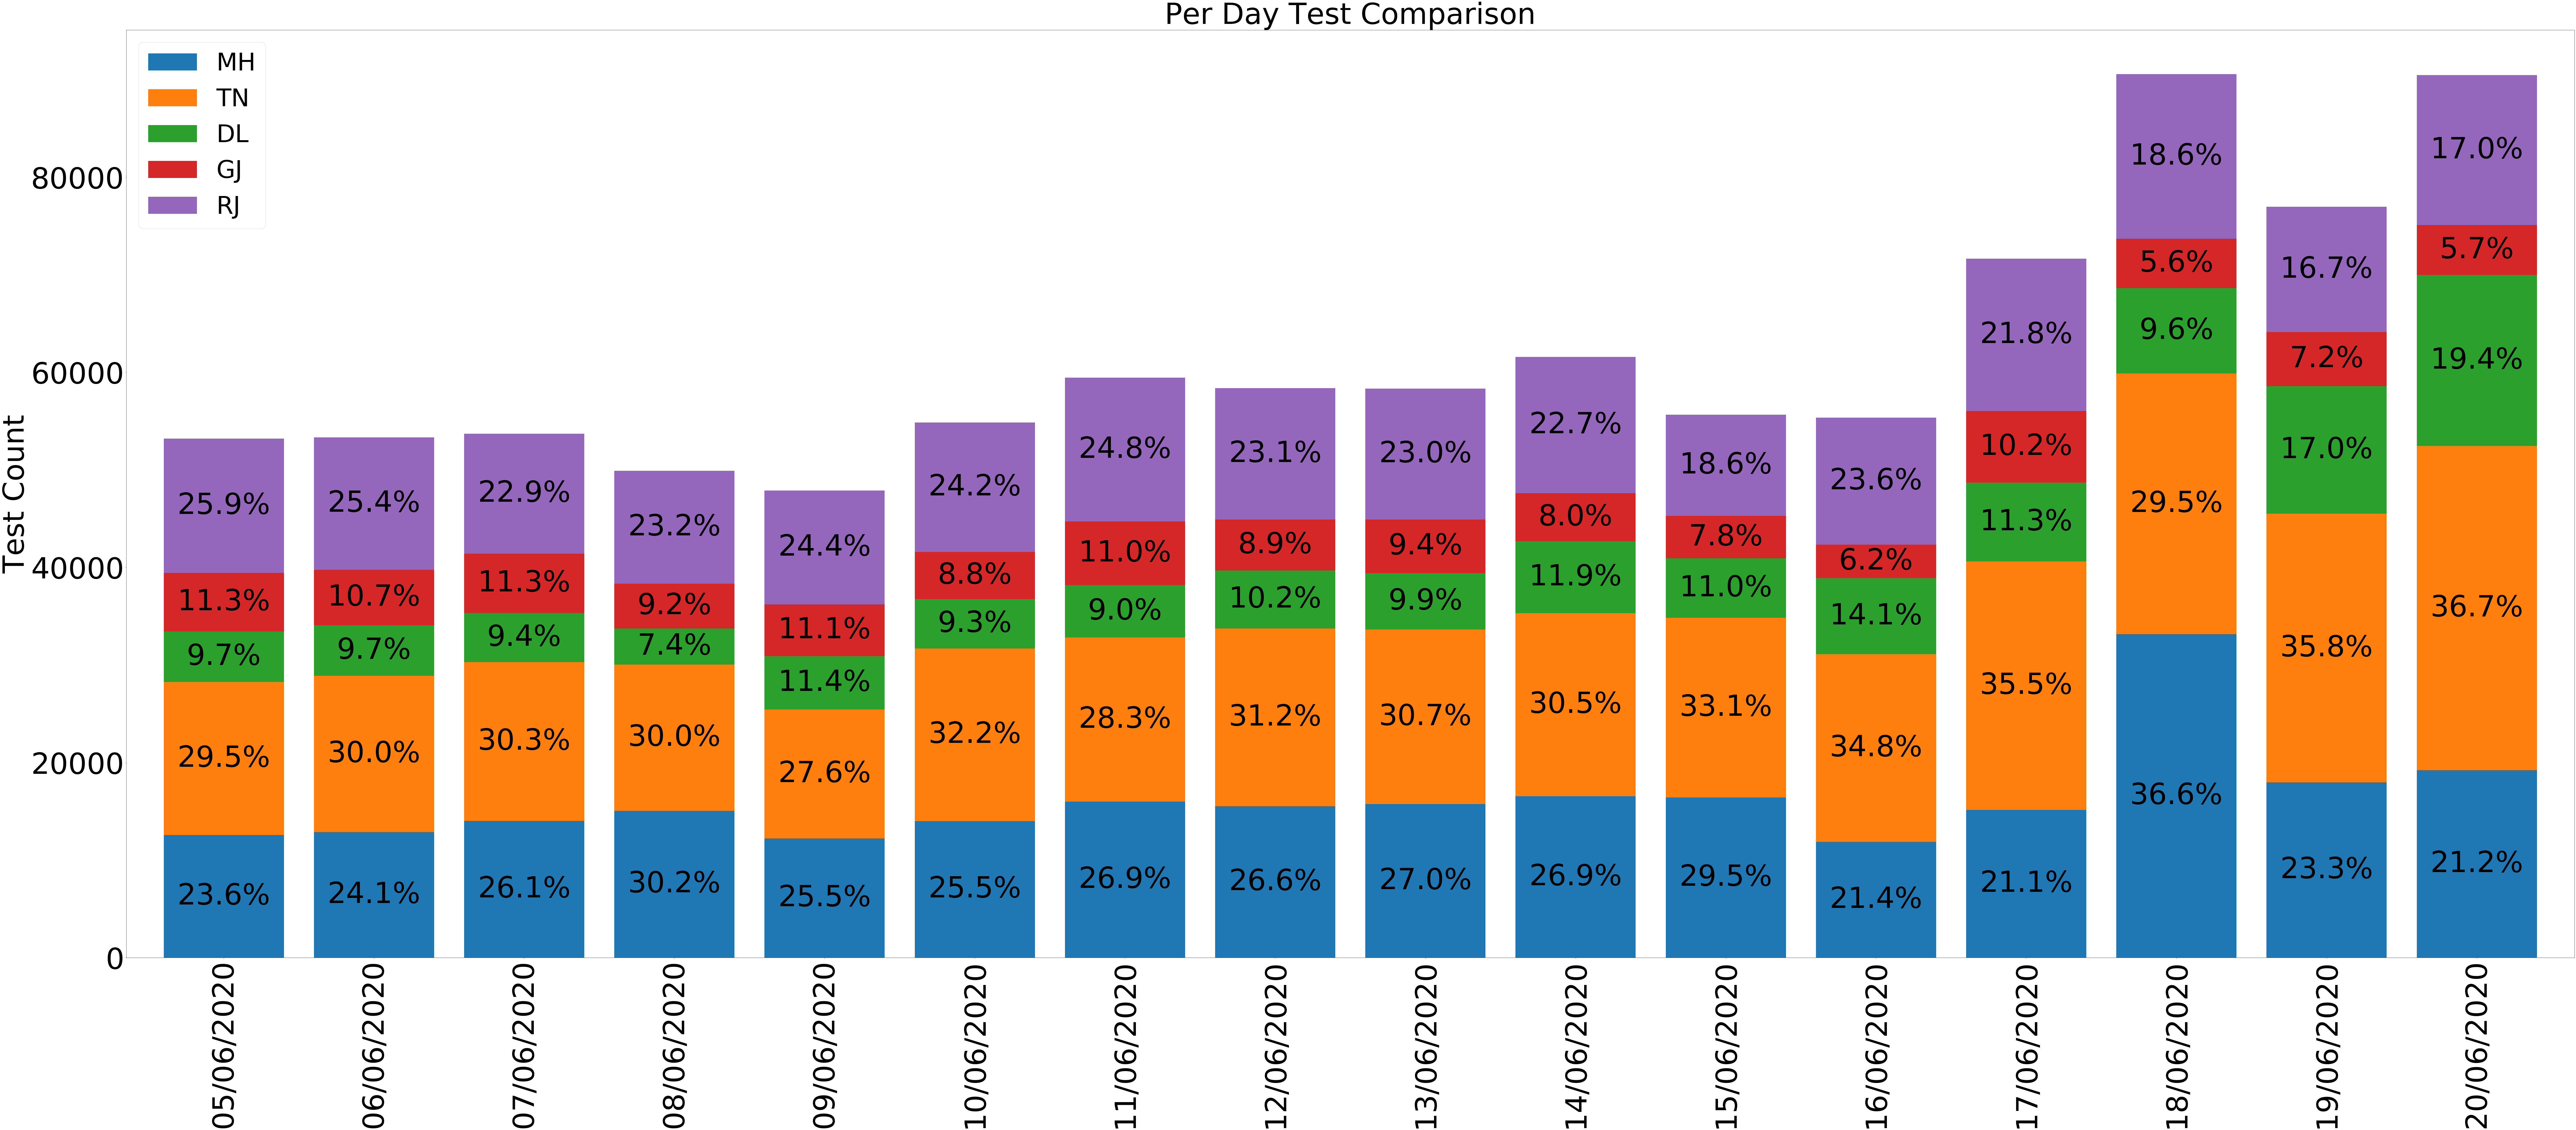

In [46]:
data = {'MH':mh_daywise_tested[59:],'TN': tn_daywise_tested[59:],'DL': dl_daywise_tested[58:], 'GJ': gj_daywise_tested[57:], 'RJ': rj_daywise_tested[60:]}
index = wb_date[61:]
dataFrame = pd.DataFrame(data=data, index=index);
dataFrame.plot.bar(rot=90,figsize=(180, 70), width=0.8,stacked=True);
plot.tick_params(axis ='both', which ='major',  
               labelsize = 120, pad = 5  
               );
plot.legend(["MH","TN","DL","GJ","RJ"],loc=2, prop={'size': 100})
plot.ylabel("Test Count",size=120)
plot.title("Per Day Test Comparison",size=120)
for i in range(len(wb_date[61:])):
    plot.text(i,mh_daywise_tested[59:][i]/2,str(np.round(mh_per_case[i], 1)) + '%',fontsize=120,ha='center',va='center')
    plot.text(i,mh_daywise_tested[59:][i] + (tn_daywise_tested[59:][i]/2),str(np.round(tn_per_case[i], 1)) + '%',fontsize=120,ha='center',va='center')
    plot.text(i,mh_daywise_tested[59:][i]+tn_daywise_tested[59:][i]+(dl_daywise_tested[58:][i]/2),str(np.round(dl_per_case[i], 1)) + '%',fontsize=120,ha='center',va='center')
    plot.text(i,mh_daywise_tested[59:][i]+tn_daywise_tested[59:][i]+dl_daywise_tested[58:][i]+(gj_daywise_tested[57:][i]/2),str(np.round(gj_per_case[i], 1)) + '%',fontsize=120,ha='center',va='center')
    plot.text(i,mh_daywise_tested[59:][i]+tn_daywise_tested[59:][i]+dl_daywise_tested[58:][i]+gj_daywise_tested[57:][i]+(rj_daywise_tested[60:][i]/2),str(np.round(rj_per_case[i], 1)) + '%',fontsize=120,ha='center',va='center')
plot.show(block=True);


In [45]:
total_daywise_case = []
total_daywise_case = [mh_daywise_tested[59:][i] + tn_daywise_tested[59:][i] + dl_daywise_tested[58:][i] + gj_daywise_tested[57:][i] + rj_daywise_tested[60:][i]  for i in range(len(mh_daywise_tested[59:]))] 

mh_per_case = [(mh_daywise_tested[59:][i]/total_daywise_case[i])*100 for i in range(len(mh_daywise_tested[59:]))]
tn_per_case = [(tn_daywise_tested[59:][i]/total_daywise_case[i])*100 for i in range(len(mh_daywise_tested[59:]))]
dl_per_case = [(dl_daywise_tested[58:][i]/total_daywise_case[i])*100 for i in range(len(mh_daywise_tested[59:]))]
gj_per_case = [(gj_daywise_tested[57:][i]/total_daywise_case[i])*100 for i in range(len(mh_daywise_tested[59:]))]
rj_per_case = [(rj_daywise_tested[60:][i]/total_daywise_case[i])*100 for i in range(len(mh_daywise_tested[59:]))]

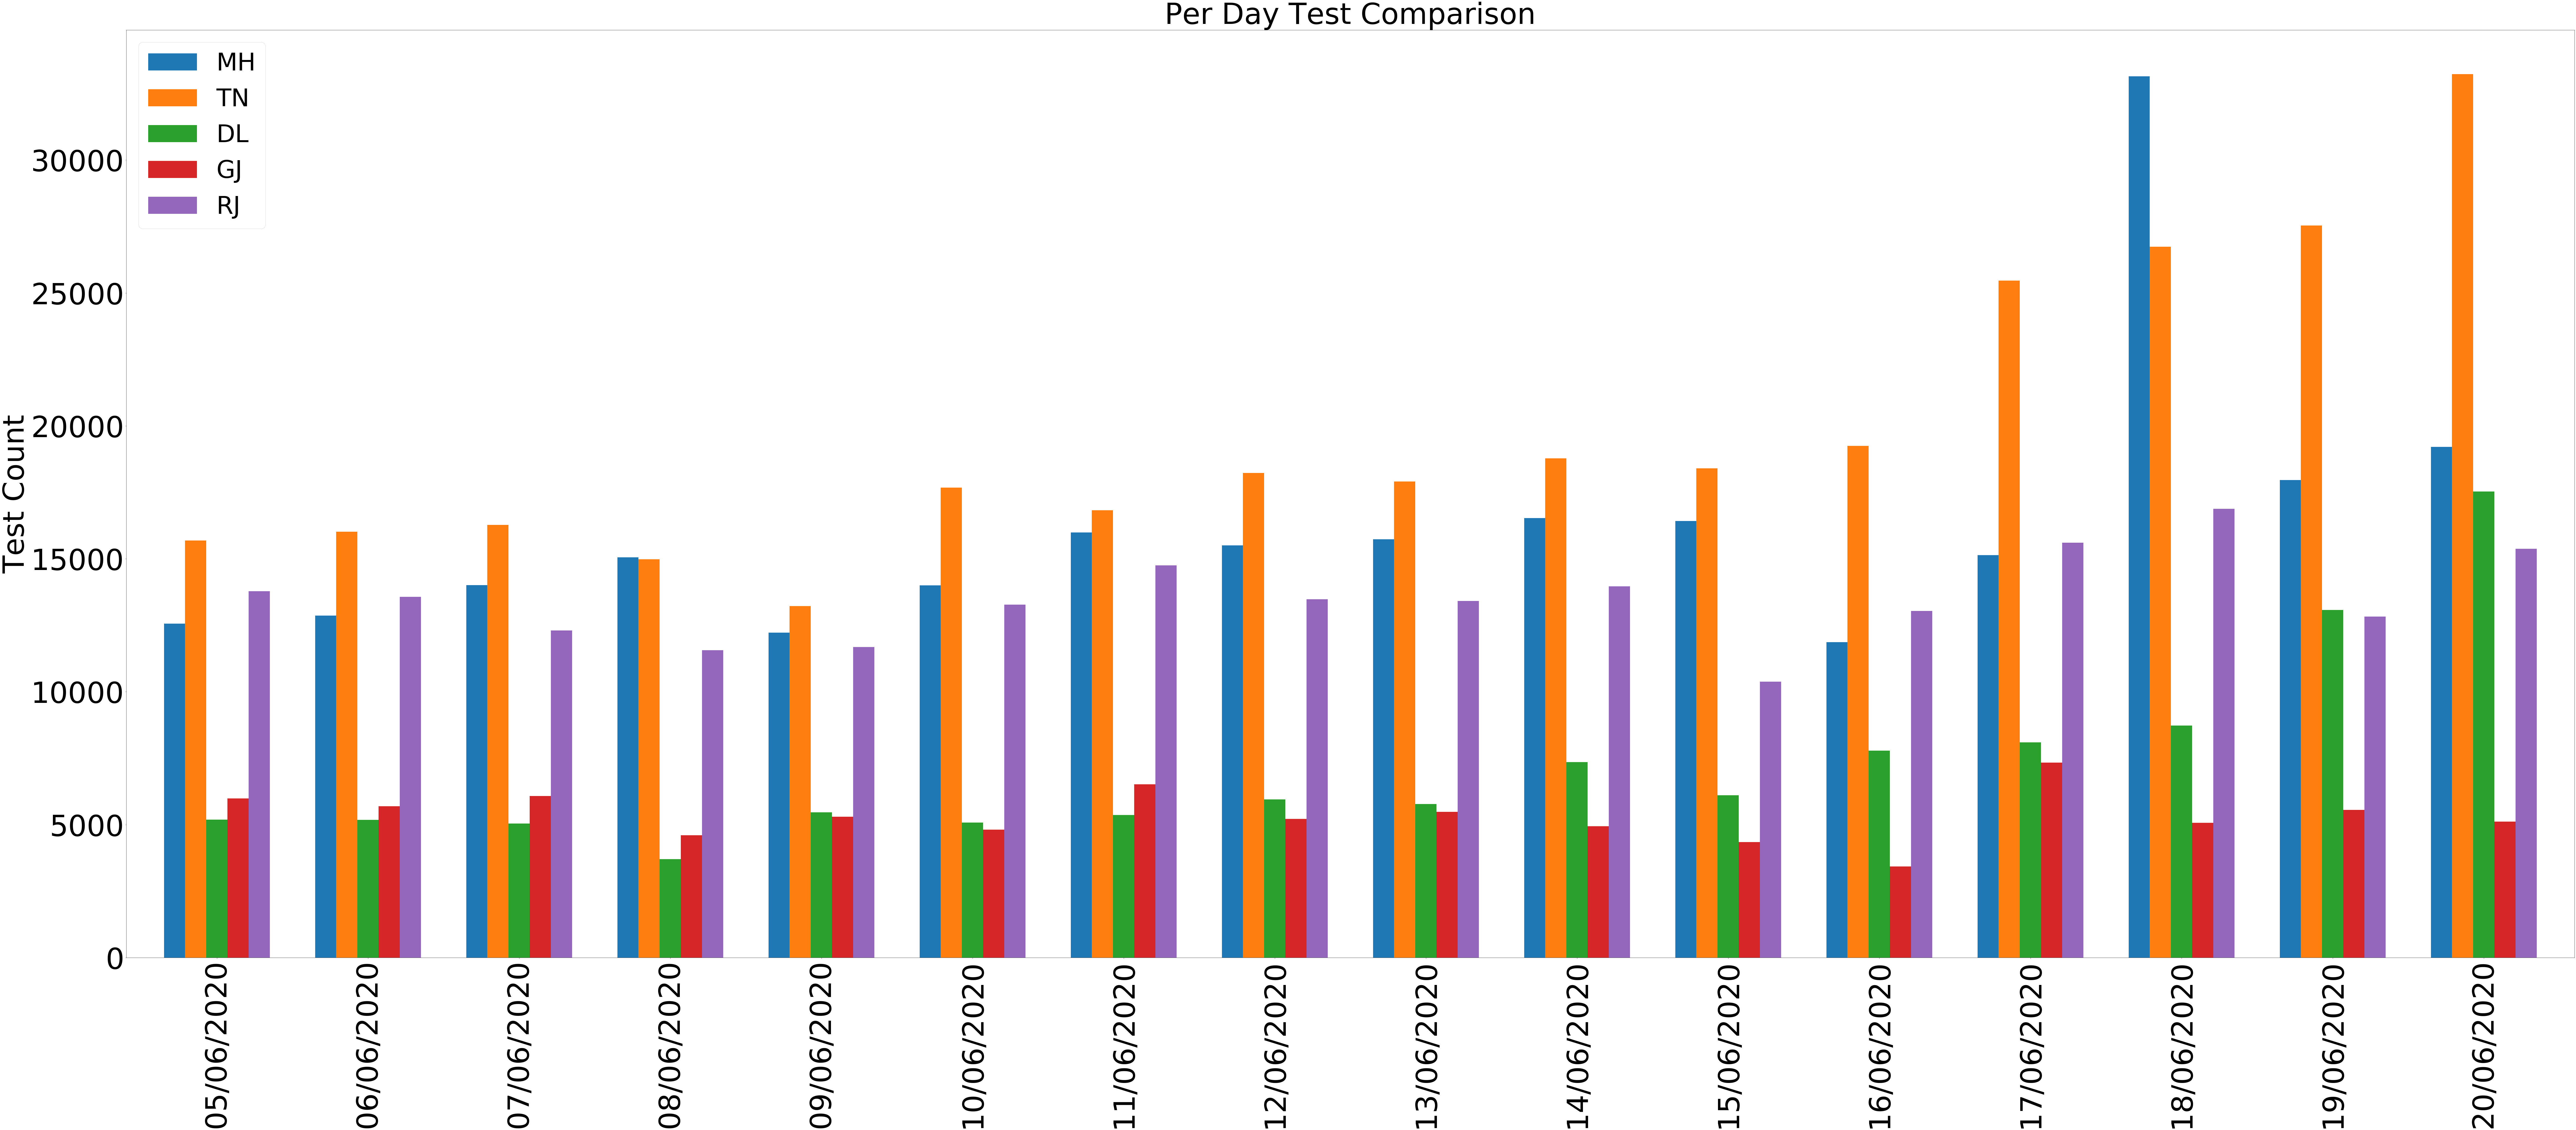

In [43]:
data = {'MH':mh_daywise_tested[59:],'TN': tn_daywise_tested[59:],'DL': dl_daywise_tested[58:], 'GJ': gj_daywise_tested[57:], 'RJ': rj_daywise_tested[60:]}
index = wb_date[61:]
dataFrame = pd.DataFrame(data=data, index=index);
dataFrame.plot.bar(rot=90,figsize=(180, 70), width=0.7,stacked=False);
plot.tick_params(axis ='both', which ='major',  
               labelsize = 120, pad = 5  
               );
plot.legend(["MH","TN","DL","GJ","RJ"],loc=2, prop={'size': 100})
plot.ylabel("Test Count",size=120)
plot.title("Per Day Test Comparison",size=120)
plot.show(block=True);